In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [99]:
df = pd.read_csv('Kerela_FINAL_new.csv')
df.set_index('Date', inplace=True)

In [100]:
df.head()

,Tourists,Year,Month,No_of_flight_bookings,No_of_hotel_booked,Tourism,Tourism_Packages,Tourist_Places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min
Date,,,,,,,,,,,,,,,
2010-01-01,818356.0,2010,1,2991,2123306.250,86,82,24,51,78,0,35,6.8313,29.35,15.42
2010-02-01,721201.0,2010,2,2812,1861236.000,89,32,0,44,72,0,35,20.1979,31.79,16.11
2010-03-01,719944.0,2010,3,3136,1797776.875,100,100,33,47,66,0,90,66.8573,33.31,18.42
2010-04-01,735432.0,2010,4,2668,1787449.625,92,85,32,49,65,0,100,94.4786,33.71,20.62
2010-05-01,803431.0,2010,5,2518,1795854.375,100,29,18,54,64,0,56,112.6957,33.06,19.15


In [101]:
data=df
data.dtypes

Tourists                 float64
Year                       int64
Month                      int64
No_of_flight_bookings      int64
No_of_hotel_booked       float64
Tourism                    int64
Tourism_Packages           int64
Tourist_Places             int64
Travel                     int64
Food_Drink                 int64
Flights_Kerala             int64
Trains_Kerala              int64
Rain                     float64
T_Max                    float64
T_Min                    float64
dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1=df.drop("Month", axis=1)
df_normalized = scaler.fit_transform(df1)
df_normalized = pd.DataFrame(data=df_normalized)

In [ ]:
df_normalized.columns=df1.columns

In [ ]:
df_normalized.columns

In [ ]:
# Plot each feature against "Total Tourists"
features = list(df_normalized.columns)
features.remove('Total Tourists')

for feature in features:
    plt.figure(figsize=(10, 6))
    plt.plot(df_normalized.index, df_normalized['Total Tourists'], label='Total Tourists', marker='o', linestyle='-')
    plt.plot(df_normalized.index, df_normalized[feature], label=feature, marker='o', linestyle='-')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(f'{feature} vs Total Tourists')
    plt.legend()
    plt.grid()
    plt.show()

Correlation Matrix

<IPython.core.display.Javascript object>

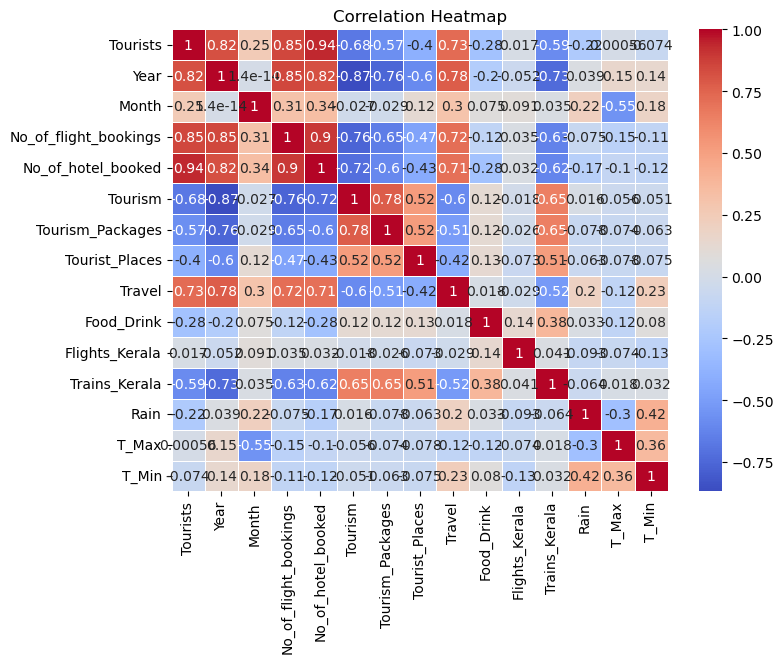

In [102]:
corrmat = df.iloc[:120].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Line Plot

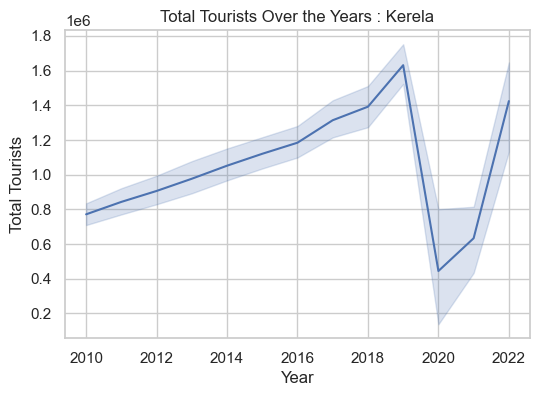

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the dark theme
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 4)) 

# Assuming df is your DataFrame
sns.lineplot(x='Year', y='Tourists', data=df)
plt.xlabel('Year')
plt.ylabel('Total Tourists')
plt.title('Total Tourists Over the Years : Kerela')
plt.show()


Bar Plot

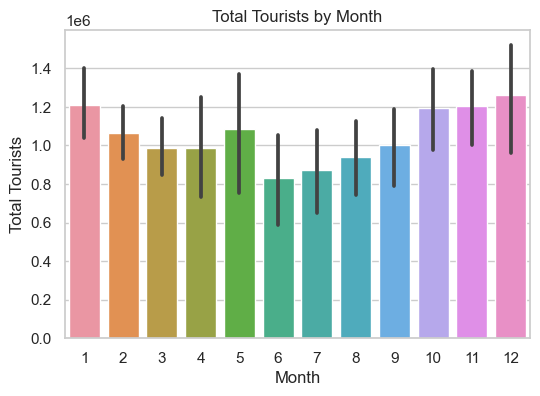

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4)) 
# Assuming df is your DataFrame
sns.barplot(x='Month', y='Tourists', data=df)
plt.xlabel('Month')
plt.ylabel('Total Tourists')
plt.title('Total Tourists by Month')
plt.show()


Scatter Plot

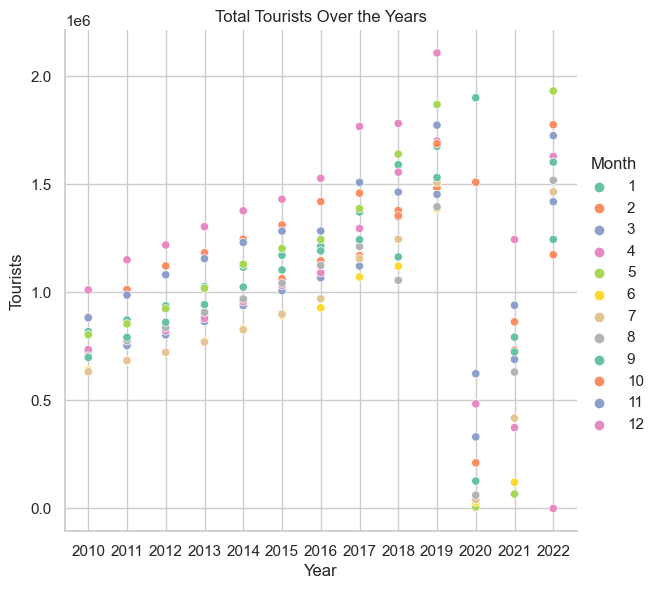

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style to a different Seaborn theme (e.g., "whitegrid")
sns.set(style="whitegrid")

# Get unique years from your data
years = df['Year'].unique()

# Create a Seaborn relplot for visualization with a custom palette
# You can specify a different palette using the 'palette' parameter
sns.relplot(x='Year', y='Tourists', hue='Month', data=df, palette="Set2", height=6, aspect=1)
# plt.figure(figsize=(6, 4)) 
# Set the x-axis ticks to show only unique years
plt.xticks(ticks=years, labels=years)

# Set the title for the plot
plt.title("Total Tourists Over the Years")

plt.show()


Histogram

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Assuming df is your DataFrame
sns.histplot(df['Total Tourists'], kde=True)
plt.xlabel('Total Tourists')
plt.ylabel('Frequency')
plt.title('Distribution of Total Tourists')
plt.show()


Pie chart

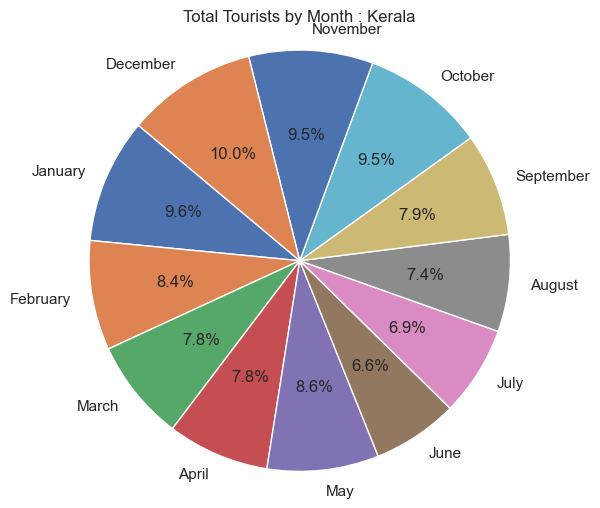

In [126]:
import matplotlib.pyplot as plt

# List of month names
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Assuming df is your DataFrame
# Group the data by month and calculate the total tourists in each month
monthly_totals = df.groupby('Month')['Tourists'].sum()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(monthly_totals, labels=month_names, autopct='%1.1f%%', startangle=140)
plt.title('Total Tourists by Month : Kerala')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the pie chart
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# List of features (columns) you want to create scatter plots for
features_to_plot = df.columns  # Replace with your actual column names

# Create separate scatter plots with linear regression lines for each feature
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.lmplot(x='Year', y=feature, data=df, hue='Month')
    plt.title(f'Scatter Plot with Linear Regression Line for {feature}')
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# List of months you want to create scatter plots for
months_to_plot = df['Month'].unique()  # Assuming 'Month' is a column in your DataFrame

# Create separate scatter plots with linear regression lines for each month
for month in months_to_plot:
    month_data = df[df['Month'] == month]
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.lmplot(x='Year', y='Total Tourists', data=month_data)
    plt.title(f'Scatter Plot with Linear Regression Line for {month}')
    plt.xlabel('Year')
    plt.ylabel('Total Tourists')
    plt.show()
